## Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

In [2]:
crime=pd.read_csv("D:\\execlr\\Assignments\\Assignment 7\\crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
crime[crime.duplicated()]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [41]:
# For Making Clustering Easy
crime1=crime.iloc[:,1:]
crime1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


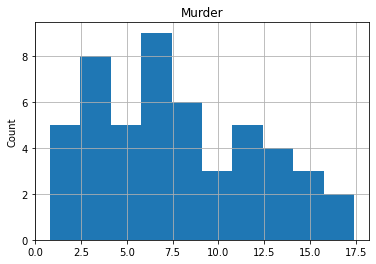

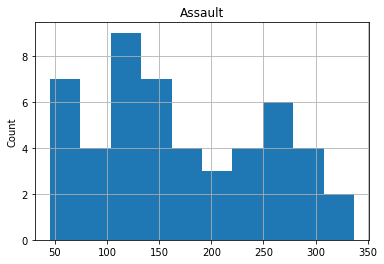

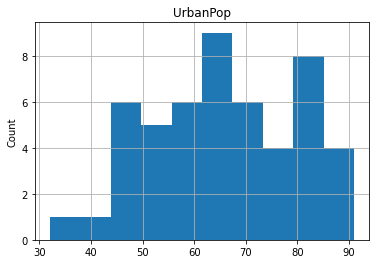

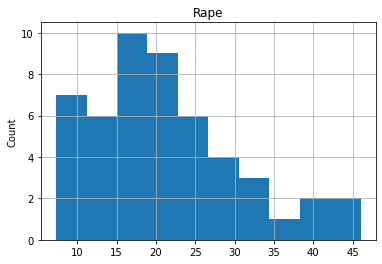

In [44]:
# Lets analyze the features by creating histograms to understand the distribution
for feature in crime1.columns:
    crime1=crime1.copy()
    crime1[feature].hist(bins=10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Murder


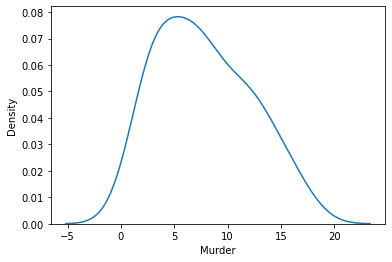

Assault


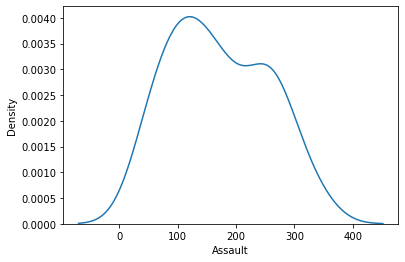

UrbanPop


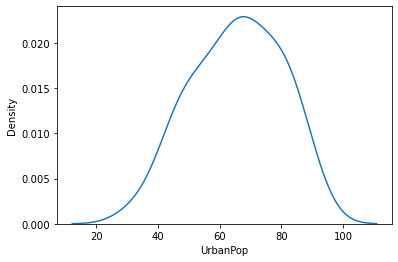

Rape


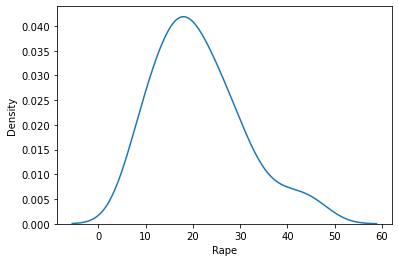

In [45]:
 # Kernel Density for every feature, singled out
for n in crime1.columns:
    print(n)
    sns.kdeplot(crime1[n])
    plt.show()

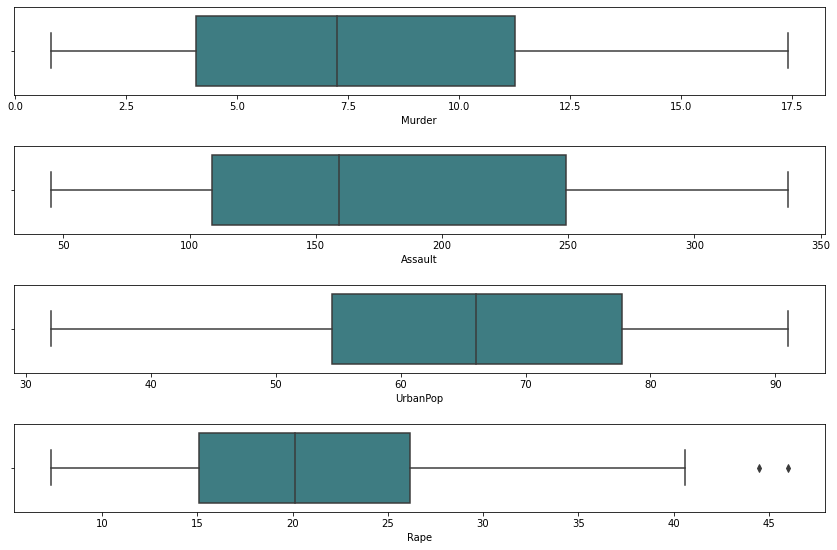

In [46]:
ot=crime1.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Assault',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='UrbanPop',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Rape',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

<AxesSubplot:>

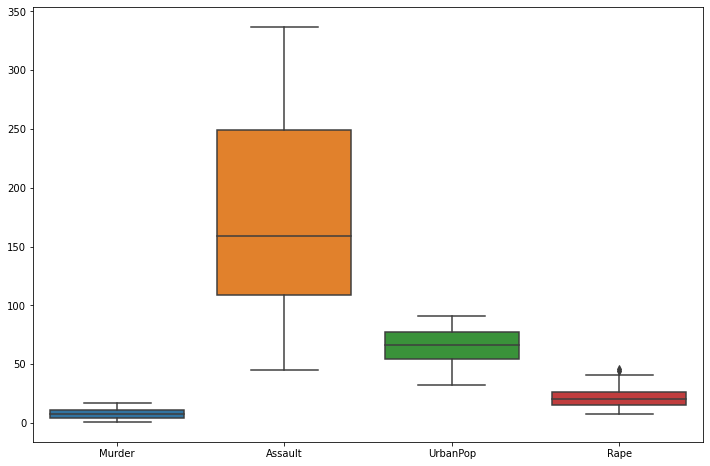

In [47]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8))
sns.boxplot(data=crime1)

<AxesSubplot:>

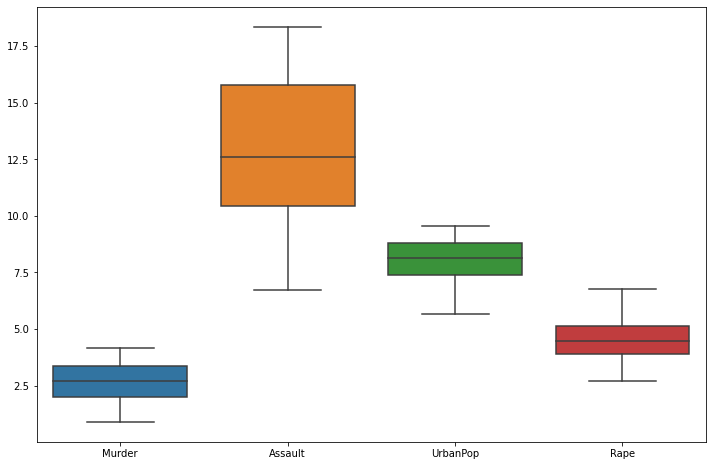

In [49]:
# we use sqrt() to see more clearly despite the outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(crime1))

In [50]:
# Correlation
crime4.corr()

,Murder,Assault,UrbanPop,Rape,Clusters
Murder,1.000000,0.801873,0.069573,0.563579,-0.661296
Assault,0.801873,1.000000,0.258872,0.665241,-0.626989
UrbanPop,0.069573,0.258872,1.000000,0.411341,0.085606
Rape,0.563579,0.665241,0.411341,1.000000,-0.552761
Clusters,-0.661296,-0.626989,0.085606,-0.552761,1.000000


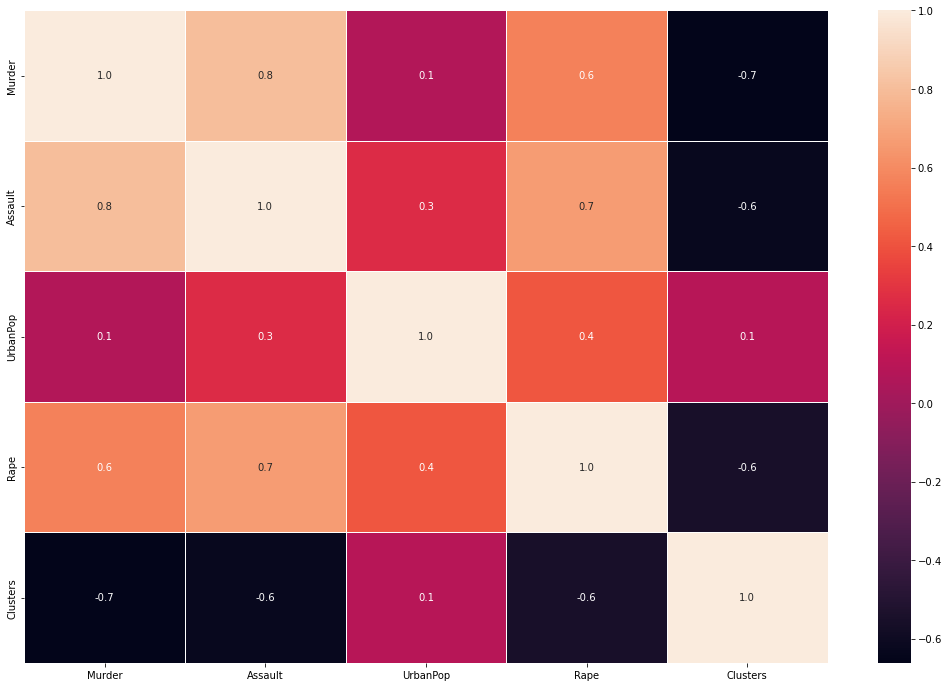

In [51]:
# correlation heatmap
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(crime4.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

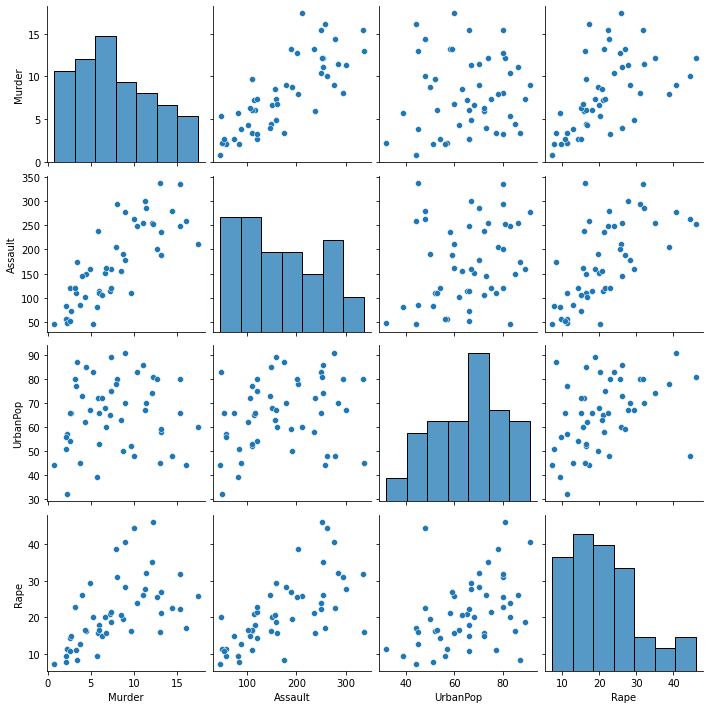

In [52]:
sns.pairplot(crime1)

### Normalization data

In [7]:
# Normalization function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [8]:
#Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime1.iloc[:,1:])
df_norm

,Assault,UrbanPop,Rape
0,0.654110,0.440678,0.359173
1,0.746575,0.271186,0.961240
2,0.852740,0.813559,0.612403
3,0.496575,0.305085,0.315245
4,0.791096,1.000000,0.860465
5,0.544521,0.779661,0.811370
6,0.222603,0.762712,0.098191
7,0.660959,0.677966,0.219638
8,0.993151,0.813559,0.635659
9,0.568493,0.474576,0.478036


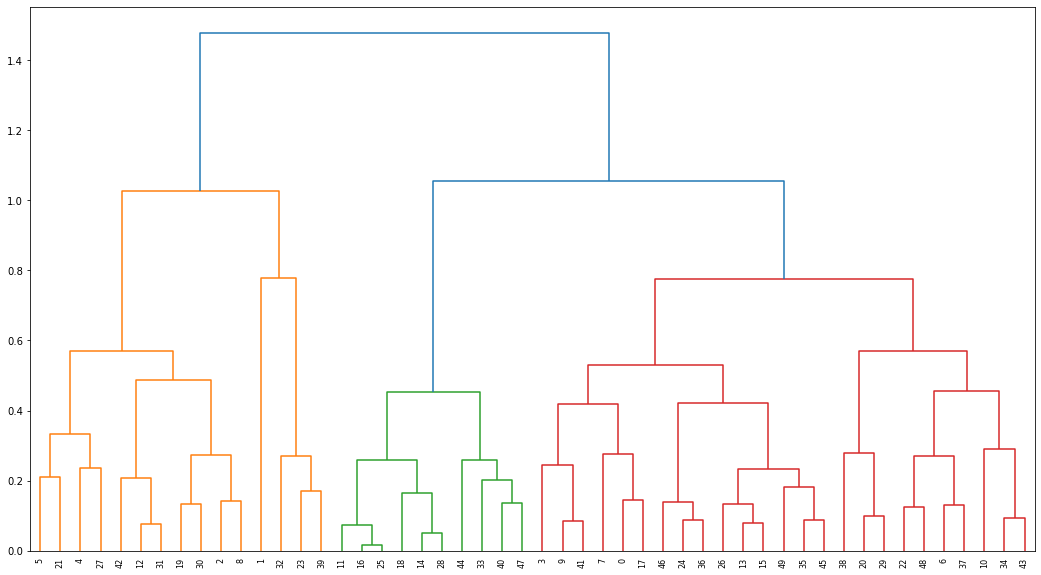

In [54]:
#creating dendrogram
plt.figure(figsize =(18,10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

### Hierarchical Clustering

In [10]:
#Creating clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [11]:
#Saving clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
y_hc

array([1, 0, 3, 1, 3, 3, 1, 1, 3, 1, 1, 2, 3, 1, 2, 1, 2, 1, 2, 3, 1, 3,
       1, 0, 1, 2, 1, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [12]:
Clusters.value_counts()

Clusters
1           25
3           11
2           10
0            4
dtype: int64

In [13]:
hc.labels_

array([1, 0, 3, 1, 3, 3, 1, 1, 3, 1, 1, 2, 3, 1, 2, 1, 2, 1, 2, 3, 1, 3,
       1, 0, 1, 2, 1, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [14]:
# Making copy of data set for Adding clusters to it
crime2 = crime1.copy()
crime2['Clusters']=hc.labels_
crime2.head()

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,3


In [15]:
crime2.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.375000,284.500000,46.250000,25.050000
1,1,7.084000,148.040000,69.560000,19.460000
2,2,3.720000,79.400000,48.300000,11.610000
3,3,11.054545,264.090909,79.090909,32.618182


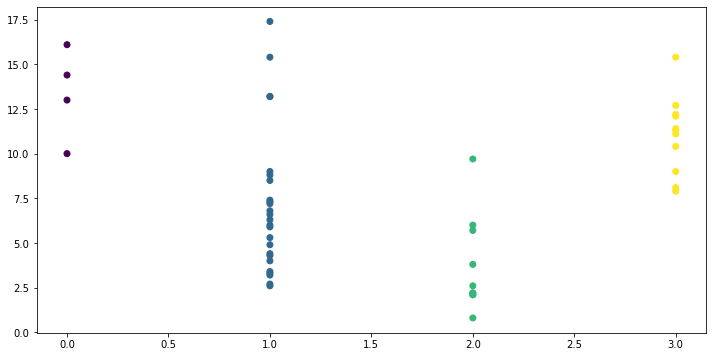

In [16]:
#Plotting Clusters
plt.figure(figsize=(12, 6))  
plt.scatter(crime2['Clusters'],crime2['Murder'], c=hc.labels_)

### KMEANS

In [17]:
crime3 = crime1.copy()
crime_norm2= df_norm.copy()
#Using within-cluster sum-of-squares criterion (WCSS) 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(crime_norm2)
    wcss.append(kmeans.inertia_)
wcss

[9.81079986191271,
 5.402228407473674,
 4.07229247196431,
 2.862177288277413,
 2.5120393424254295,
 2.1410790988100836,
 1.9049291531150392,
 1.6330113751074415,
 1.3752576725800347,
 1.274312591320283]

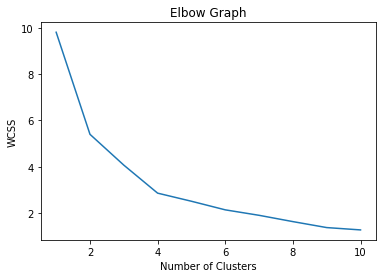

In [18]:
#Plotting K values range vs WCSS to get Elbow graph for choosing K (No. of Clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
#Cluster algorithm using K=4
clusters_4=KMeans(4,random_state=30).fit(crime_norm2)
clusters_4

KMeans(n_clusters=4, random_state=30)

In [20]:
#Assigning clusters to the original data set
crime3['Clusters_4_']=clusters_4.labels_
crime3.head()

,Murder,Assault,UrbanPop,Rape,Clusters_4_
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,3


In [21]:
#Computing the centroids for K=4 clusters 
clusters_4.cluster_centers_

array([[0.6802226 , 0.36864407, 0.36466408],
       [0.34075342, 0.71186441, 0.31983922],
       [0.11485774, 0.34028683, 0.12601868],
       [0.76961395, 0.74884438, 0.69884895]])

In [22]:
#Grouping data by Clusters (k=4)
crime3.groupby('Clusters_4_').agg(['mean']).reset_index()

,Clusters_4_,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,6.233333,144.500000,74.000000,19.677778
2,2,3.600000,78.538462,52.076923,12.176923
3,3,10.809091,269.727273,76.181818,34.345455


In [23]:
crime3

,Murder,Assault,UrbanPop,Rape,Clusters_4_
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,0


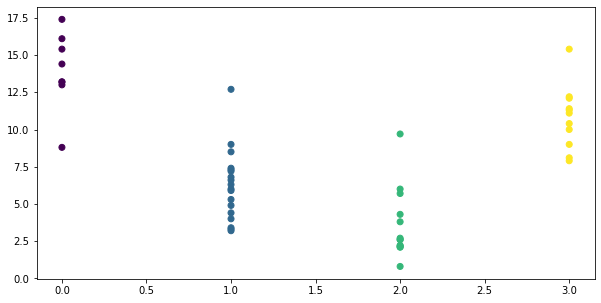

In [24]:
#Plotting Clusters
plt.figure(figsize=(10, 5))  
plt.scatter(crime3['Clusters_4_'],crime3['Murder'], c=clusters_4.labels_)

## DBSCAN

In [25]:
#Normalizing heterogenous numerical data using standard scalar fit transform to dataset
crime4 = crime1.copy()
crime_norm3 = StandardScaler().fit_transform(crime4)

In [26]:
dbscan = DBSCAN(eps = 1, min_samples = 5).fit(crime_norm3)

In [27]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  1, -1,  0, -1,  0,  0,  0, -1,  0,  1, -1, -1, -1,  0,
        0,  0,  0,  0,  1, -1,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0],
      dtype=int64)

In [28]:
crime_norm3


array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [29]:
#Making clusters column 
Clusters=pd.DataFrame(dbscan.labels_,columns=['clusters'])
Clusters

,clusters
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [30]:
#Adding clusters the to dataset
crime4['Clusters']=dbscan.labels_
crime4

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [31]:
crime4.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.152174,236.913043,66.739130,27.034783
1,0,4.904167,108.625000,61.708333,16.516667
2,1,5.066667,160.666667,87.000000,14.466667


In [32]:
crime4

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [36]:
crime4.Clusters.value_counts()

 0    24
-1    23
 1     3
Name: Clusters, dtype: int64

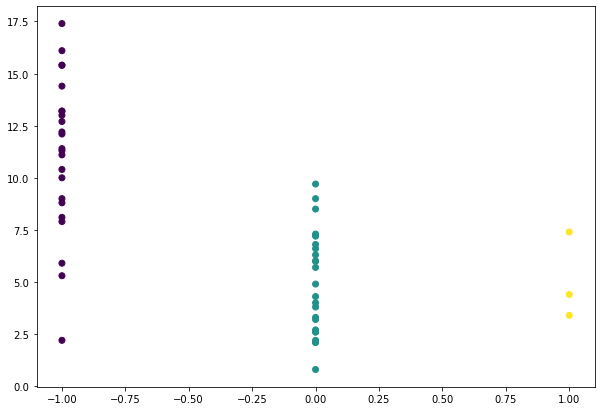

In [37]:
#Plotting Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime4['Clusters'],crime4['Murder'], c=dbscan.labels_)

### Conclusion
#### 1 - Analysing Murder and Assault variables shows a clearer connection between them. Higher the murder rates in a city higer the assaults and vice versa

#### 2 - Contrary to murders and assaults, there is much more spread among the clusters when comparing murders and rapes. Some correlation is visible, but low murder rates in a city seem to indicate lower number of rapes and vice versa

#### 3 - As with murder and assault, also rates of rape and assault show clearer correlations